In [1]:
from agent import Agent
from utils import compute_score_bounds, compute_continuity_noise, compute_contraction_noise
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eta = np.array([3., 0.]).reshape(2, 1)
gamma = np.array([0.1, 1.]).reshape(2, 1)
min_eigenvalue = min(gamma)
agent = Agent(eta, gamma)
beta = np.array([1., 0.]).reshape(2, 1)
continuity_sigma = np.sqrt(1 / (2 * min_eigenvalue * (np.sqrt(2 * np.pi * np.e)))) + 0.05
contraction_sigma = np.sqrt(1 / (min_eigenvalue * (np.sqrt(2 * np.pi * np.e))))

In [3]:
discontinuity_sigma = 0.7
discontinuity_sigma

0.7

In [4]:
discontinuity_sigma_w_fp = 1.
discontinuity_sigma_w_fp

1.0

In [5]:
continuity_sigma

array([1.14993346])

In [6]:
contraction_sigma

array([1.55554082])

In [7]:
bounds = compute_score_bounds(beta, discontinuity_sigma)
thresholds = np.linspace(bounds[0], bounds[1], 5000)

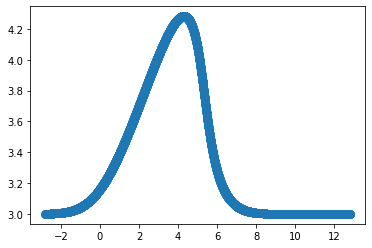

In [8]:
scores_brs_contraction = [np.matmul(beta.T, agent.best_response(beta, s, contraction_sigma)).item() for s in thresholds]
plt.scatter(thresholds, scores_brs_contraction, s=60.)

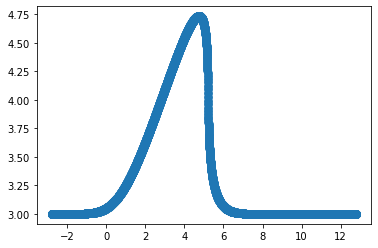

In [9]:
scores_brs_cont = [np.matmul(beta.T, agent.best_response(beta, s, continuity_sigma)).item() for s in thresholds]
plt.scatter(thresholds, scores_brs_cont, s=60.)

In [10]:
scores_brs_discont = np.array([np.matmul(beta.T, agent.best_response(beta, s, discontinuity_sigma)).item() for s in thresholds])
good_idx = np.where(scores_brs_discont != 0)

/home/users/rsahoo/miniconda3/envs/py3/lib/python3.8/site-packages/scipy/optimize/zeros.py:459: RuntimeWarning: some failed to converge after 10000 iterations
  warnings.warn(msg, RuntimeWarning)


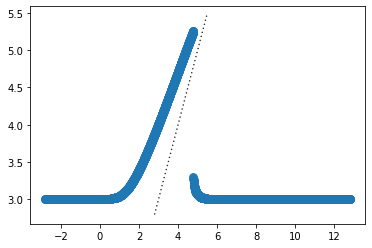

In [12]:
plt.scatter(thresholds[good_idx], scores_brs_discont[good_idx], s=60.)
line = np.linspace(min(scores_brs_discont[good_idx]) - 0.2, max(scores_brs_discont[good_idx]) + 0.2, 50)
plt.scatter(line, line, linestyle="dashed", c="k", s=0.2)

In [13]:
scores_brs_discont_w_fp = np.array([np.matmul(beta.T, agent.best_response(beta, s, discontinuity_sigma_w_fp)).item() for s in thresholds])
good_idx = np.where(scores_brs_discont_w_fp != 0)

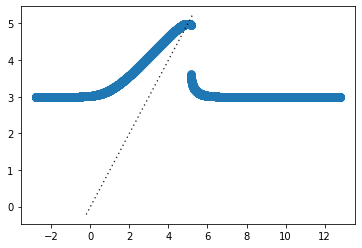

In [14]:
plt.scatter(thresholds[good_idx], scores_brs_discont_w_fp[good_idx], s=60.)
line = np.linspace(min(scores_brs_discont[good_idx]) - 0.2, max(scores_brs_discont_w_fp[good_idx]) + 0.2, 50)
plt.scatter(line, line, linestyle="dashed", c="k", s=0.2)

In [27]:
# scores_brs_no_noise = np.array([np.matmul(beta.T, agent.best_response(beta, s, 0.05)).item() for s in thresholds])
# good_idx = np.where(scores_brs_no_noise != 0)

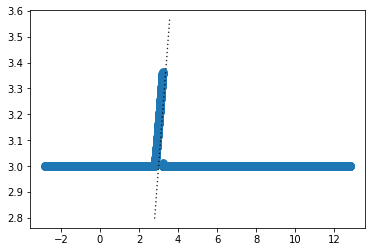

In [28]:
# plt.scatter(thresholds[good_idx], scores_brs_no_noise[good_idx], s=60.)
# line = np.linspace(min(scores_brs_no_noise[good_idx]) - 0.2, max(scores_brs_no_noise[good_idx]) + 0.2, 50)
# plt.scatter(line, line, linestyle="dashed", c="k", s=0.2)

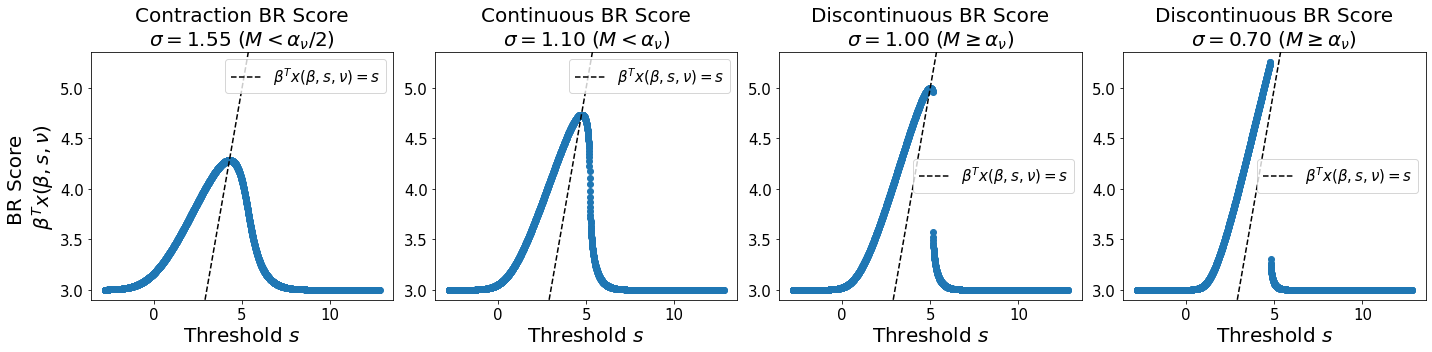

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharex=True)
#plt.xlabel("Perceived Threshold " + r"$s$")

line = np.linspace(min(scores_brs_discont[good_idx]) - 0.1, max(scores_brs_discont[good_idx]) + 0.1, 50)

ax[0].scatter(thresholds, )

ax[0].scatter(thresholds, scores_brs_contraction)
ax[0].set_title("Contraction BR Score\n" + r"$\sigma=1.55$" + " " + r"$(M < \alpha_{\nu}/2)$", fontsize=20)


ax[1].scatter(thresholds, scores_brs_cont)
#ax[2].set_xlabel("Perceived Threshold " + r"$s$")
#ax[2].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
ax[1].set_title("Continuous BR Score\n" + r"$\sigma=1.10$"  + " " + r"$(M < \alpha_{\nu})$", fontsize=20)


ax[2].scatter(thresholds, scores_brs_discont_w_fp)
#ax[1].set_xlabel("Perceived Threshold " + r"$s$")
#ax[2].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
ax[2].set_title("Discontinuous BR Score\n" + r"$\sigma=1.00$"  + " " + r"$(M \geq \alpha_{\nu})$", fontsize=20)


ax[3].scatter(thresholds[good_idx], scores_brs_discont[good_idx])
#ax[0].set_xlabel("Perceived Threshold " + r"$s$")
ax[0].set_ylabel("BR Score \n" + r"$\beta^{T}x(\beta, s, \nu)$", fontsize=20)
ax[3].set_title("Discontinuous BR Score" + "\n" + r"$\sigma=0.70$"  + " " + r"$(M \geq \alpha_{\nu})$", fontsize=20)

all_scores = scores_brs_cont + scores_brs_discont

max_score = max(max(scores_brs_discont), max(scores_brs_cont))+ 0.10
min_score = min(min(scores_brs_cont), min(scores_brs_cont)) - 0.10

ax[3].set_ylim(min_score , max_score )
ax[2].set_ylim(min_score , max_score )
ax[1].set_ylim(min_score , max_score )
ax[0].set_ylim(min_score , max_score )




# # Get extents of subplot
# x0 = min([a.get_position().x0 for a in ax])
# y0 = min([a.get_position().y0 for a in ax])
# x1 = max([a.get_position().x1 for a in ax])
# y1 = max([a.get_position().y1 for a in ax])

# # Hidden axes for common x and y labels
# plt.axes([x0, y0, x1 - x0, y1 - y0], frameon=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
for i in range(4):
    ax[i].set_xlabel("Threshold " + r"$s$", fontsize=20)
    ax[i].xaxis.set_tick_params(labelsize=15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[i].plot(line, line, "--", c="k", label=r"$\beta^{T}x(\beta, s, \nu) = s$")
    ax[i].legend(fontsize=15)


plt.tight_layout()
plt.savefig("figs/paper_continuity.pdf")


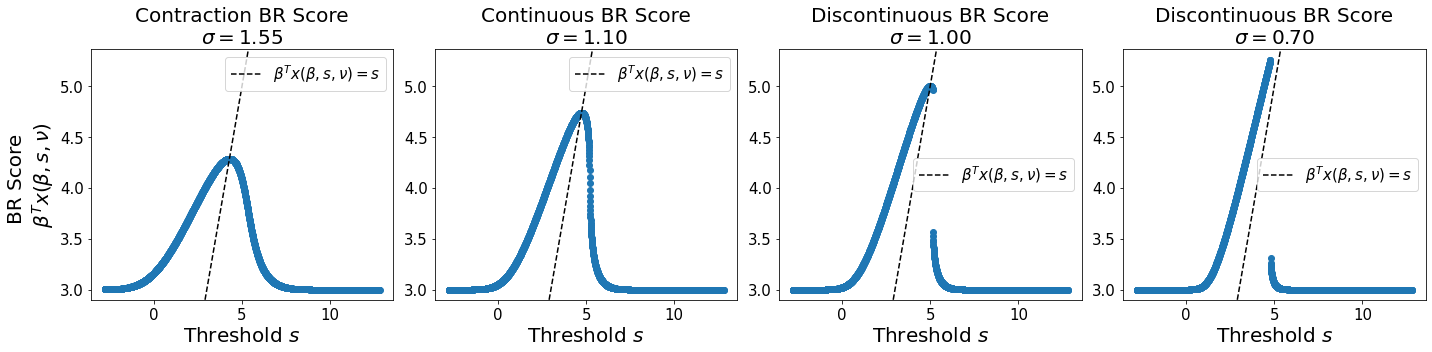

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharex=True)
#plt.xlabel("Perceived Threshold " + r"$s$")

line = np.linspace(min(scores_brs_discont[good_idx]) - 0.1, max(scores_brs_discont[good_idx]) + 0.1, 50)

ax[0].scatter(thresholds, scores_brs_contraction)
ax[0].set_title("Contraction BR Score\n" + r"$\sigma=1.55$", fontsize=20)


ax[1].scatter(thresholds, scores_brs_cont)
#ax[2].set_xlabel("Perceived Threshold " + r"$s$")
#ax[2].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
ax[1].set_title("Continuous BR Score\n" + r"$\sigma=1.10$", fontsize=20)


ax[2].scatter(thresholds, scores_brs_discont_w_fp)
#ax[1].set_xlabel("Perceived Threshold " + r"$s$")
#ax[2].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
ax[2].set_title("Discontinuous BR Score\n" + r"$\sigma=1.00$", fontsize=20)


ax[3].scatter(thresholds[good_idx], scores_brs_discont[good_idx])
#ax[0].set_xlabel("Perceived Threshold " + r"$s$")
ax[0].set_ylabel("BR Score \n" + r"$\beta^{T}x(\beta, s, \nu)$", fontsize=20)
ax[3].set_title("Discontinuous BR Score" + "\n" + r"$\sigma=0.70$", fontsize=20)

all_scores = scores_brs_cont + scores_brs_discont

max_score = max(max(scores_brs_discont), max(scores_brs_cont))+ 0.10
min_score = min(min(scores_brs_cont), min(scores_brs_cont)) - 0.10

ax[3].set_ylim(min_score , max_score )
ax[2].set_ylim(min_score , max_score )
ax[1].set_ylim(min_score , max_score )
ax[0].set_ylim(min_score , max_score )




# # Get extents of subplot
# x0 = min([a.get_position().x0 for a in ax])
# y0 = min([a.get_position().y0 for a in ax])
# x1 = max([a.get_position().x1 for a in ax])
# y1 = max([a.get_position().y1 for a in ax])

# # Hidden axes for common x and y labels
# plt.axes([x0, y0, x1 - x0, y1 - y0], frameon=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
for i in range(4):
    ax[i].set_xlabel("Threshold " + r"$s$", fontsize=20)
    ax[i].xaxis.set_tick_params(labelsize=15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[i].plot(line, line, "--", c="k", label=r"$\beta^{T}x(\beta, s, \nu) = s$")
    ax[i].legend(fontsize=15)


plt.tight_layout()
plt.savefig("figs/continuity-4.pdf")


No handles with labels found to put in legend.
No handles with labels found to put in legend.


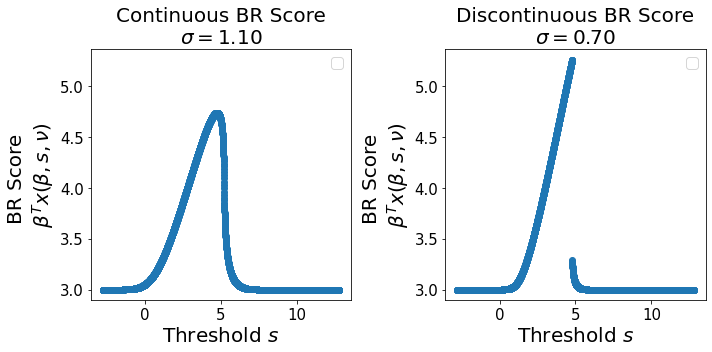

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
ax[0].scatter(thresholds, scores_brs_cont)
#ax[2].set_xlabel("Perceived Threshold " + r"$s$")
#ax[2].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
ax[0].set_title("Continuous BR Score\n" + r"$\sigma=1.10$", fontsize=20)


ax[1].scatter(thresholds[good_idx], scores_brs_discont[good_idx])
#ax[0].set_xlabel("Perceived Threshold " + r"$s$")
ax[0].set_ylabel("BR Score \n" + r"$\beta^{T}x(\beta, s, \nu)$", fontsize=20)
ax[1].set_title("Discontinuous BR Score" + "\n" + r"$\sigma=0.70$", fontsize=20)
all_scores = scores_brs_cont + scores_brs_discont

max_score = max(max(scores_brs_discont), max(scores_brs_cont))+ 0.10
min_score = min(min(scores_brs_cont), min(scores_brs_cont)) - 0.10

for i in range(2):
    ax[i].set_ylim(min_score , max_score )
    ax[i].set_xlabel("Threshold " + r"$s$", fontsize=20)
    ax[i].xaxis.set_tick_params(labelsize=15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    #ax[i].plot(line, line, "--", c="k", label=r"$\beta^{T}x(\beta, s, \nu) = s$")
    ax[i].legend(fontsize=15)
    ax[i].set_ylabel("BR Score \n" + r"$\beta^{T}x(\beta, s, \nu)$", fontsize=20)


plt.tight_layout()
plt.savefig("figs/continuity-2.pdf")

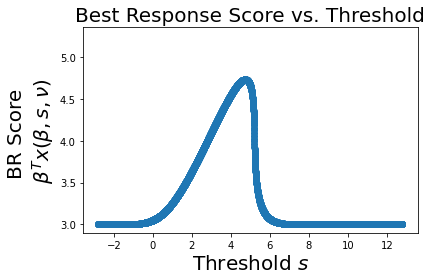

In [18]:
plt.scatter(thresholds, scores_brs_cont)
#ax[2].set_xlabel("Perceived Threshold " + r"$s$")
#ax[2].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
plt.title("Best Response Score vs. Threshold", fontsize=20)

max_score = max(max(scores_brs_discont), max(scores_brs_cont))+ 0.10
min_score = min(min(scores_brs_cont), min(scores_brs_cont)) - 0.10
plt.ylim(min_score , max_score )
plt.xlabel("Threshold " + r"$s$", fontsize=20)
plt.ylabel("BR Score \n" + r"$\beta^{T}x(\beta, s, \nu)$", fontsize=20)
#plt.xaxis.set_tick_params(labelsize=15)
#plt.yaxis.set_tick_params(labelsize=15)
#plt.plot(line, line, "--", c="k", label=r"$\beta^{T}x(\beta, s, \nu) = s$")
#plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig("figs/continuity-1.pdf")

